# IO

In [1]:
import PineBioML.IO as IO

In [2]:
# example_PipeLine.py ./input/ example_data.xlsx 0 y

data = IO.read_file("./input/HAPTdata.csv", index_col=None)

##### pick the target label column
y = data["target"]

##### drop the target from dataframe, using the remaining to predict y (the target)
x = data.drop("target", axis = 1)

# Train test split

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, random_state=142, shuffle=True)

# Data Overview

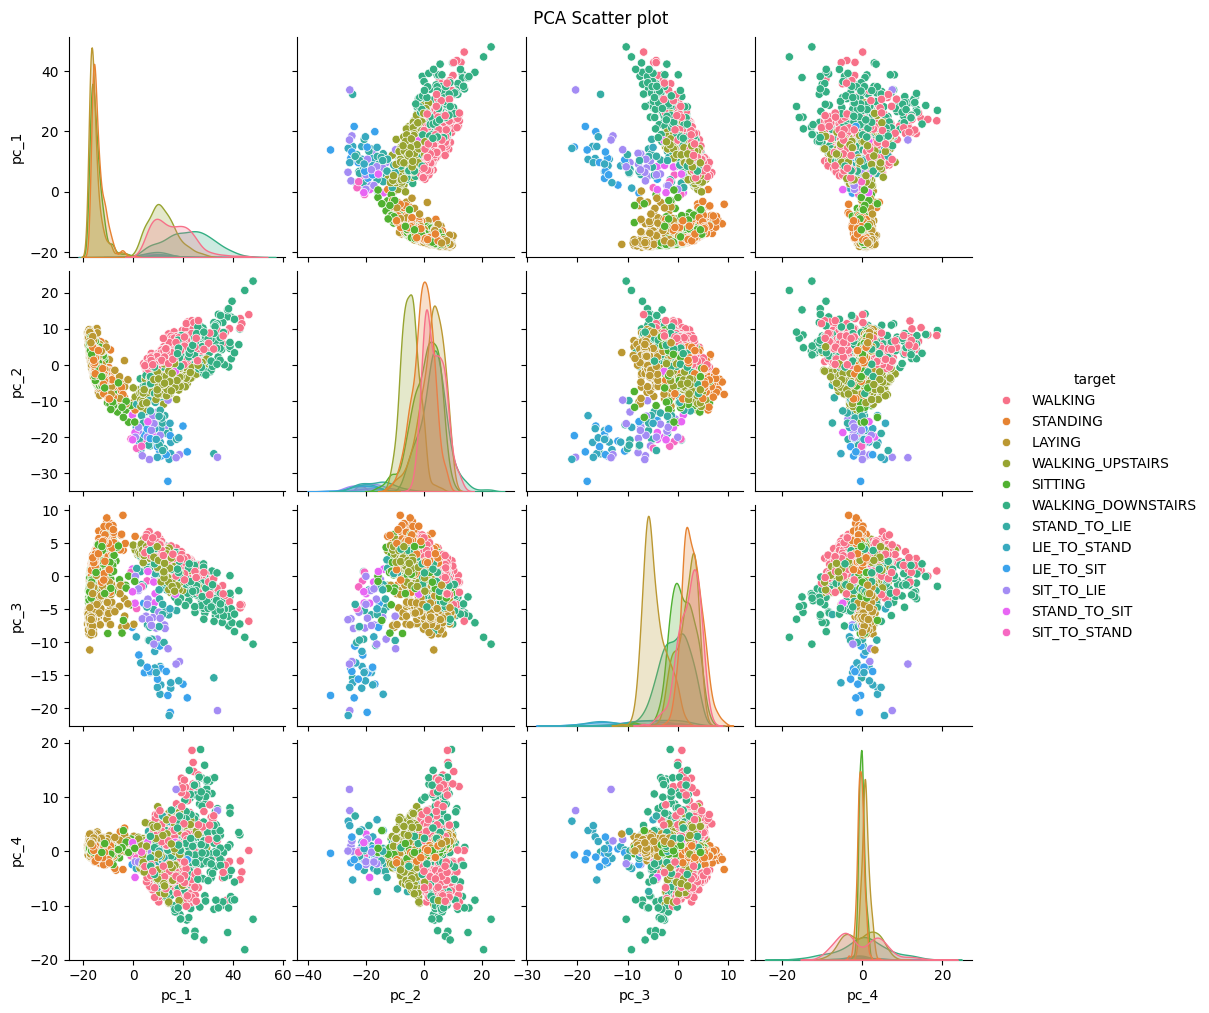

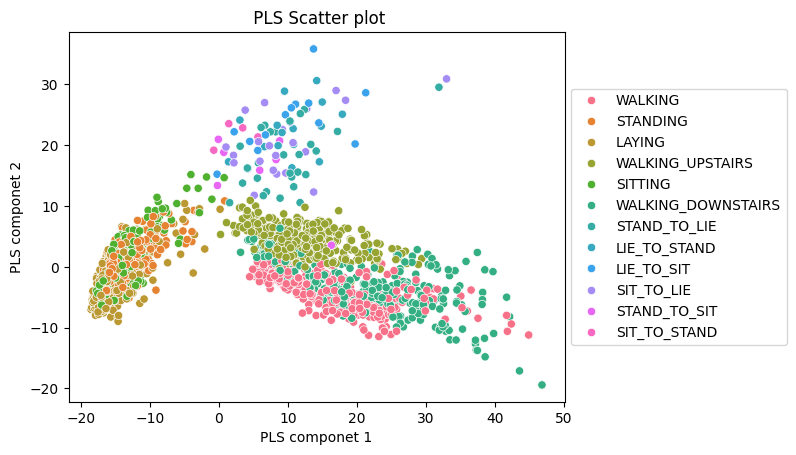

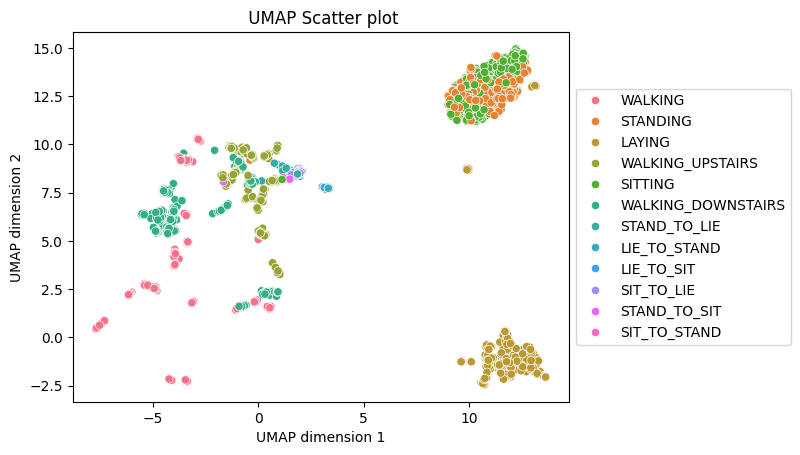

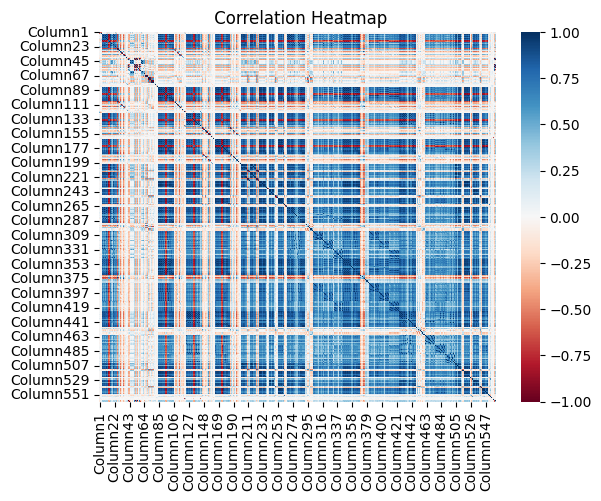

In [4]:
from PineBioML.report.utils import data_overview
data_overview(x_train, y_train, show_fig = True)

# Modeling

In [5]:
from PineBioML.preprocessing import Normalizer
from PineBioML.preprocessing import impute
from PineBioML.selection.classification import essemble_selector
import PineBioML.model.supervised.Classification as tuner
from sklearn.pipeline import Pipeline

In [6]:
pipe = Pipeline(
    [
        ("Standarization", Normalizer(method="StandardScaler")),
        ("Missing_Value_Processing", impute.simple_imputer(threshold = 0.6, strategy = "constant")),
        ("Feature_Selection", essemble_selector(z_importance_threshold = 1)),
        ("Modeling", tuner.RandomForest_tuner(target="qwk"))
     ]
)

In [7]:
pipe.fit(x_train, y_train)

Using  c45  to select.


100%|██████████| 561/561 [00:03<00:00, 174.75it/s]


c45  is done.

Using  RF_gini  to select.
RF_gini  is done.

Using  Lasso_Bisection  to select.
Lasso_Bisection  is done.

Using  multi_Lasso  to select.
multi_Lasso  is done.

Using  SVM  to select.
SVM  is done.

Using  AdaBoost  to select.
I don't have a progress bar but I am running
AdaBoost  is done.

Using  XGboost  to select.
XGboost  is done.

Using  Lightgbm  to select.
Lightgbm  is done.

optuna seed 13699  |  validation seed 130  |  model seed 1814
    RandomForest start tuning. it will take a while.
    optuna is better, best trial:  47


Pipeline(steps=[('Standarization',
                 <PineBioML.preprocessing.Normalizer object at 0x000001C9BF78C6D0>),
                ('Missing_Value_Processing',
                 <PineBioML.preprocessing.impute.simple_imputer object at 0x000001C9BF78C5B0>),
                ('Feature_Selection',
                 <PineBioML.selection.classification.essemble_selector object at 0x000001C9BF78CDC0>),
                ('Modeling',
                 <PineBioML.model.supervised.Classification.RandomForest_tuner object at 0x000001C9ADB08A30>)])

# Evaluation

In [14]:
from PineBioML.report.utils import classification_summary

classification_summary(y_valid, pipe.predict_proba(x_valid), show_fig=False)


 
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       179
        LIE_TO_SIT       0.38      0.45      0.42        11
      LIE_TO_STAND       0.30      0.25      0.27        12
           SITTING       0.92      0.97      0.95       151
        SIT_TO_LIE       0.89      0.80      0.84        10
      SIT_TO_STAND       1.00      0.67      0.80         6
          STANDING       0.96      0.92      0.94       183
      STAND_TO_LIE       0.62      0.84      0.71        19
      STAND_TO_SIT       0.50      0.13      0.21        15
           WALKING       0.93      0.89      0.91       172
WALKING_DOWNSTAIRS       0.94      0.91      0.92       128
  WALKING_UPSTAIRS       0.86      0.96      0.90       158

          accuracy                           0.91      1044
         macro avg       0.78      0.73      0.74      1044
      weighted avg       0.91      0.91      0.91      1044



<Figure size 640x480 with 0 Axes>

# Saving Model

In [10]:
# save model
IO.save_model(pipe, "./output/models/", "MostInOne", overide=True)

MostInOne  has already exist in  ./output/models/
It will be overide.


# Reload model

In [11]:
# load model
presaved_model = IO.load_model("./output/models/MostInOne")


 
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       179
        LIE_TO_SIT       0.38      0.45      0.42        11
      LIE_TO_STAND       0.30      0.25      0.27        12
           SITTING       0.92      0.97      0.95       151
        SIT_TO_LIE       0.89      0.80      0.84        10
      SIT_TO_STAND       1.00      0.67      0.80         6
          STANDING       0.96      0.92      0.94       183
      STAND_TO_LIE       0.62      0.84      0.71        19
      STAND_TO_SIT       0.50      0.13      0.21        15
           WALKING       0.93      0.89      0.91       172
WALKING_DOWNSTAIRS       0.94      0.91      0.92       128
  WALKING_UPSTAIRS       0.86      0.96      0.90       158

          accuracy                           0.91      1044
         macro avg       0.78      0.73      0.74      1044
      weighted avg       0.91      0.91      0.91      1044



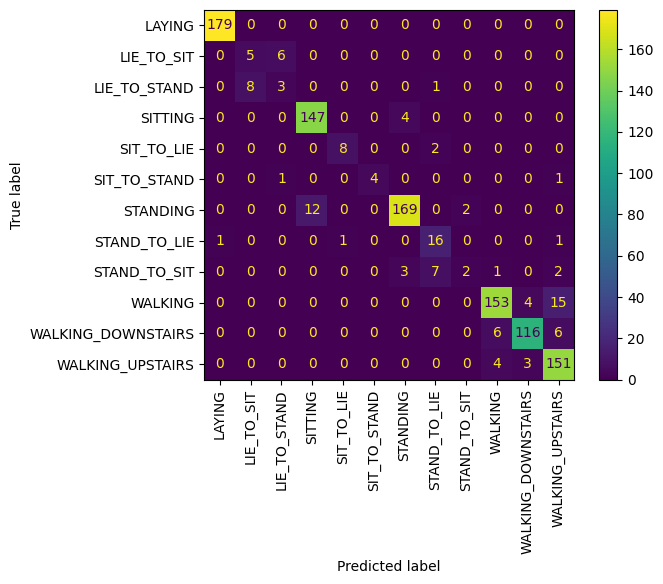

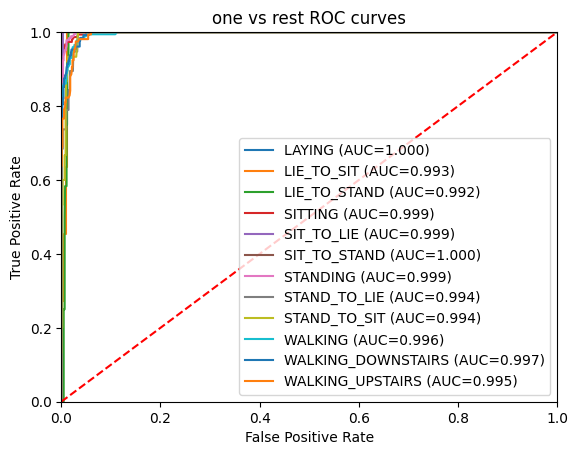

In [12]:
classification_summary(y_valid, presaved_model.predict_proba(x_valid)) 